In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
# df = pd.read_csv('US Airline Flight Routes and Fares.csv')

C:\Users\misha\AppData\Local\Temp\ipykernel_2148\1843595686.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US Airline Flight Routes and Fares.csv')


In [140]:
# df_grouped = df.groupby('Year').size().reset_index(name = 'Count').sort_values(by='Year', ascending=False)

In [141]:
# years = df_grouped['Year']
# years_to_display = [1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022]

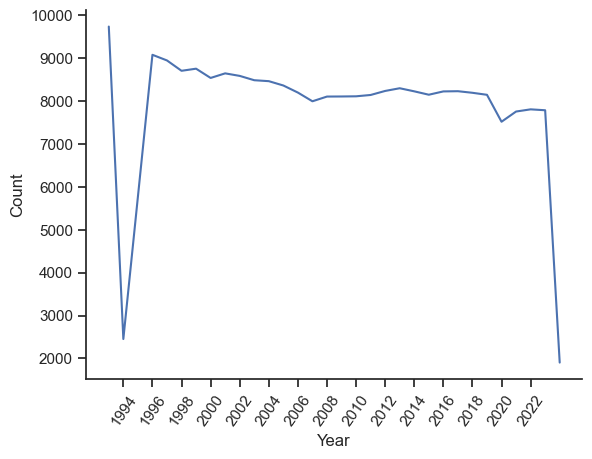

In [142]:
# sns.set_theme(style='ticks')
# sns.lineplot(data= df_grouped, x = 'Year', y = 'Count')
# sns.despine()
# plt.xticks(years_to_display, rotation = 55)
# plt.show()

In [144]:
# since there is no data for 1995 I would like to ignore all data before 2000 to have a more precise scope. 
# We also want to ignore 2024 since data for 2024 is incomplete and we can't make any conclusion about 2024

In [145]:
# years_to_remove = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2024]

In [146]:
# df_filtered = df_grouped[~df_grouped['Year'].isin(years_to_remove)]

In [147]:
# years_list = [year for year in range(2000, 2024)]

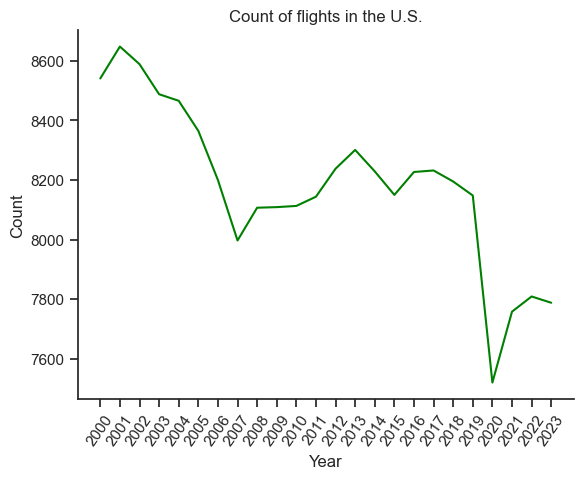

In [148]:
# sns.set_theme(style='ticks')
# sns.lineplot(data= df_filtered, x = 'Year', y = 'Count', color = 'green')
# sns.despine()
# plt.xticks(years_list, rotation = 55)
# plt.title('Count of flights in the U.S.')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.show()

In [149]:
# # we already can see a big dip from coronovirus 
# # we can find out top 5 airports based on number of flights and then plot to see their stats through the years.
# df_excluding_years = df[~df['Year'].isin(years_to_remove)].copy()
# df_excluding_years.head(1)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0,81.43,G4,1.0,81.43,NaN,NaN,202131013514112ABEPIE


In [150]:
# # these are our top 5 airports based on the data. Looks wierd to be honest. 
# df_excluding_years.groupby('airport_2').size().sort_values(ascending=False).head(5)

airport_2
DCA    8321
BWI    8269
IAD    8138
TPA    6337
SFO    5976
dtype: int64

In [151]:
# # I am creating a pivot table for each airport. I will also try grouping it as a second method. 
# df_pivot = df_excluding_years.pivot_table(index='Year', columns='airport_2',  aggfunc='size', fill_value=0)
# df_pivot.head(1)

airport_2,AZA,BDL,BNA,BOS,BUF,BUR,BWI,BZN,CAK,CHI,...,TSS,TTN,TUL,TUS,TVC,TYS,VGT,VPS,WAS,XNA
Year,,,,,,,,,,,,,,,,,,,,,
2000,0,28,83,15,12,136,354,0,28,5,...,0,0,84,73,0,16,0,0,28,0


In [153]:
# # Creating a total that then will be used for sorting values
# df_pivot.loc['Total'] = df_pivot.sum()

In [154]:
# # sorting values
# df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]

In [155]:
# # finding top 5 airports based on dataset with ability to change number any time
# top_N = 5
# df_to_plot = df_pivot.iloc[:,:top_N]
# df_to_plot = df_to_plot.drop('Total')

In [156]:
# # reseting index to use year columns for melting
# df_to_plot.reset_index(inplace = True)

In [157]:
# # melting datasets since seaborn requires it, alternatively we could just use .plot(kind='line') without melting it. 
# df_melted = df_to_plot.melt(id_vars=['Year'], var_name='Airport', value_name='Count')

<Axes: xlabel='Year', ylabel='Count'>

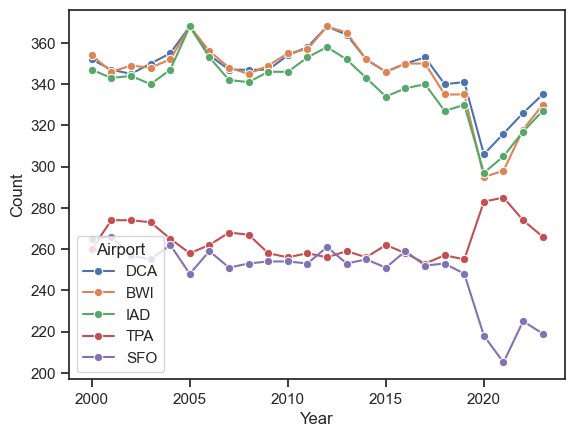

In [158]:
# # plotting
# sns.lineplot(data=df_melted, x='Year', y='Count', hue='Airport', marker='o')

In [159]:
# # we will try to achieve the same goal using group by since it can be a lot faster
# df_to_plot = df_excluding_years.groupby(['Year','airport_2']).size().reset_index(name='Count').sort_values(by = ['Year', 'Count'], ascending= False)

In [160]:
# # we will need the names of 5 airports to filter out the rest airports
# top_airports = list(df_excluding_years.groupby('airport_2').size().sort_values(ascending=False).head(top_N).index)

In [161]:
# df_to_plot = df_to_plot[df_to_plot['airport_2'].isin(top_airports)]

In [162]:
# # there are many lines now so I have decided to add some steps to xticks
# years_list = [year for year in range(2000, 2024, 2)]

Text(2019.5, 360, 'Start of COVID')

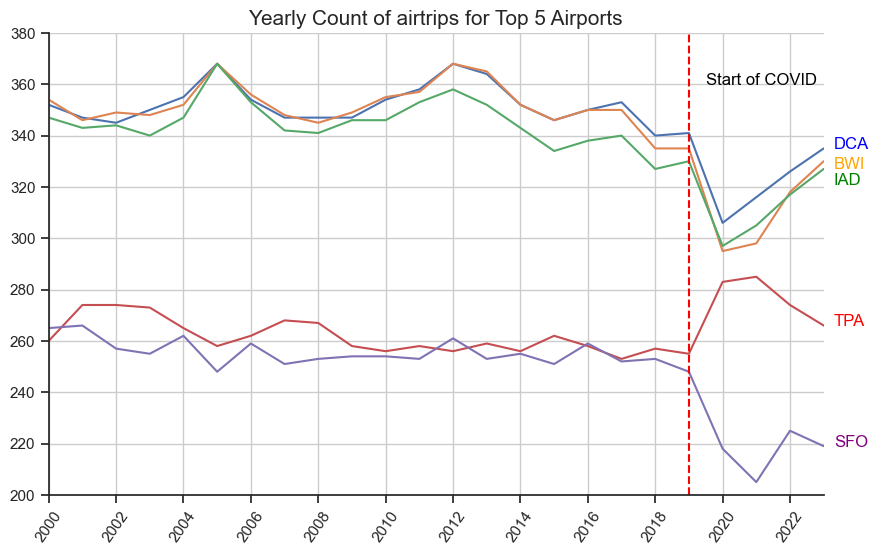

In [166]:
# # as we can see we achived the same results but in much easier way. In other words, using pivoting, totaling and sorting, and melting is not neccesery in the current situation.
# plt.figure(figsize=(10, 6))
# ax = sns.lineplot(data=df_to_plot, x='Year', y='Count', hue='airport_2')
# plt.grid(visible=True)
# sns.despine()
# plt.legend().remove()
# plt.xticks(years_list, rotation = 55)
# plt.title('Yearly Count of airtrips for Top 5 Airports', fontsize = 15)
# plt.ylabel('')
# plt.xlabel('')

# # values are set for loop by me
# offsets = {
#     'DCA': 0,
#     'BWI': -3,
#     'IAD': -6,
#     'TPA': 0,
#     'SFO': 0
# }
# colors = {
#     'DCA': 'blue',
#     'BWI': 'orange',
#     'IAD': 'green',
#     'TPA': 'red',
#     'SFO': 'purple'
# }
# plt.xlim([2000, 2023])
# plt.ylim([200, 380])

# # loop was created with the help of GPT
# for airport in df_to_plot['airport_2'].unique():
#     latest_year = df_to_plot[df_to_plot['Year'] == 2023]
#     y_value = latest_year[latest_year['airport_2'] == airport]['Count'].values[0]
#     plt.text(2023.3, y_value + offsets[airport], airport, color=colors[airport])

# plt.axvline(x=2019, color='red', linestyle='--')
# plt.text(2019.5, 360, 'Start of COVID', color = 'black')

In [164]:
# # I like the graph so far, but how did TPA - Airport in Tampa, managed to increase its number when others struggled due to COVID?
# df_tampa = df_excluding_years[(df_excluding_years['airport_2'] == 'TPA') & df_excluding_years['Year'].isin([2018,2019,2020,2021])]

In [165]:
# # Unfortunately, I didn't find anything out of the ordinary. I think this dataset was generated in a wierd way. 
# # I mean why would such airport like TPA at all be in the top 5 airports in the entire country? New Yourk? LA? 
# df_tampa.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,1080.000000,1080.000000,1080.000000,1080.0,1080.000000,1080.0,1080.000000,1080.000000,1080.000000,1080.000000,1080.00000,1080.000000,1080.000000
mean,2019.551852,2.467593,32046.255556,33195.0,12852.758333,15304.0,1169.419444,405.211111,197.474380,0.639151,198.17375,0.396565,160.185130
std,1.119006,1.128806,1375.251818,0.0,1552.954353,0.0,584.401343,412.131117,50.278281,0.186987,56.01474,0.289752,58.428218
min,2018.000000,1.000000,30135.000000,33195.0,10135.000000,15304.0,204.000000,0.000000,80.450000,0.218900,76.35000,0.010800,62.270000
25%,2019.000000,1.000000,30721.000000,33195.0,11292.000000,15304.0,818.500000,94.750000,163.217500,0.489550,160.35750,0.153200,104.847500
50%,2020.000000,2.000000,31703.000000,33195.0,13198.000000,15304.0,1044.000000,281.500000,186.775000,0.636550,188.39500,0.301100,157.265000
75%,2021.000000,3.250000,33105.000000,33195.0,14122.000000,15304.0,1204.000000,538.750000,221.635000,0.779950,224.45750,0.618925,201.122500
max,2021.000000,4.000000,35412.000000,33195.0,15412.000000,15304.0,2520.000000,1981.000000,387.520000,1.000000,437.83000,1.000000,340.660000


In [3]:
# we will test how "realistic" this data is using real data of domestic flights in US from 2022

df_2022 = pd.read_csv('CompleteData.csv')

In [4]:
df_2022.shape

(6954636, 40)

In [5]:
df_2022_ND = df_2022.drop_duplicates()
df_2022_ND.shape

(6954636, 40)

In [6]:
# droping values to optimize the speed.
df_2022 = df_2022.drop(columns=['LOWEST_CLOUD_LAYER','N_CLOUD_LAYER','LOW_LEVEL_CLOUD','MID_LEVEL_CLOUD',
'HIGH_LEVEL_CLOUD','CLOUD_COVER','ACTIVE_WEATHER','WIND_SPD','WIND_GUST', 'LATITUDE','LONGITUDE','ELEVATION',
'VISIBILITY','TEMPERATURE','DEW_POINT','REL_HUMIDITY','ALTIMETER','WIND_DIR','RANGE','WIDTH','MESONET_STATION','TAXI_OUT']) 

In [32]:
# We will visualize a real top five destination
df_top_5_destination = df_2022.groupby('DEST').size().sort_values(ascending=False).reset_index(name = 'Count').head(5)

In [33]:
df_top_5_destination.loc[5:10]

,DEST,Count


In [34]:
airport_name_mapping = {
    'ATL': 'ATL (Atlanta)', 
    'ORD' : 'ORD (Chicago)',
    'DEN' : 'DEN (Denver)',
    'DFW' : 'DFW (Dallas)',
    'CLT' : 'CLT (Charlotte)'
}
df_top_5_destination['airport_full_name'] = df_top_5_destination['DEST'].map(airport_name_mapping)

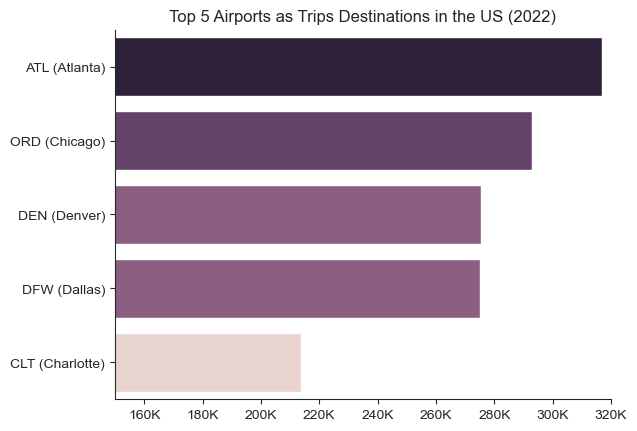

In [150]:
ax = sns.barplot(data=df_top_5_destination,  x = 'Count', y = 'airport_full_name', hue = 'Count')
sns.despine()
plt.legend().remove()
plt.xlim([150_000, 320_000])
plt.xlabel('')
plt.ylabel('')
plt.title('Top 5 Airports as Trips Destinations in the US (2022)')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))


In [20]:
df_top_5_origin =  df_2022.groupby('ORIGIN').size().sort_values(ascending=False).reset_index(name = 'Count').head(5)

In [21]:
df_top_5_origin['airport_full_name'] = df_top_5_origin['ORIGIN'].map(airport_name_mapping)

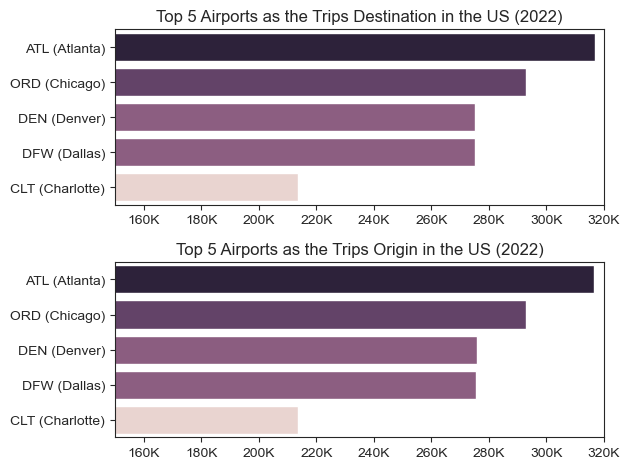

In [152]:
# as we can see there are no difference based on what we calculate "most popular airport" but we will use both
fig, ax = plt.subplots(2, 1)
sns.barplot(data=df_top_5_destination,  x = 'Count', y = 'airport_full_name', ax=ax[0], hue = 'Count')
ax[0].legend().remove()
ax[0].set_xlim([150_000, 320_000])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 5 Airports as the Trips Destination in the US (2022)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

sns.barplot(data=df_top_5_origin,  x = 'Count', y = 'airport_full_name', ax=ax[1], hue = 'Count')
ax[1].legend().remove()
ax[1].set_xlim([150_000, 320_000])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Top 5 Airports as the Trips Origin in the US (2022)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.tight_layout()
plt.show()

In [49]:
# making sure it is in datetime format
df_2022['FL_DATE'] = pd.to_datetime(df_2022['FL_DATE'])

In [50]:
# getting month in Jan format
df_2022['FL_MONTH_SHORT'] = df_2022['FL_DATE'].dt.strftime('%b')

In [51]:
# let's filter only for our top 5 airports origin
top_5_airports_list_ORIGIN = list(df_2022.groupby('ORIGIN').size().sort_values(ascending=False).head(5).index)

In [52]:
df_2022_top_5_ORIGIN = df_2022[df_2022['ORIGIN'].isin(top_5_airports_list_ORIGIN)]

In [53]:
df_2022_ORIGIN = df_2022_top_5_ORIGIN.groupby(['FL_MONTH_SHORT','ORIGIN']).size().reset_index(name = 'ORIGIN_COUNT')
# we need to add a count for destination to sum all flights. 

In [54]:
# let's filter only for our top 5 airports dest
top_5_airports_list_DEST = list(df_2022.groupby('DEST').size().sort_values(ascending=False).head(5).index)

In [55]:
df_2022_top_5_DEST = df_2022[df_2022['DEST'].isin(top_5_airports_list_DEST)]

In [56]:
df_2022_DEST = df_2022_top_5_DEST.groupby(['FL_MONTH_SHORT','DEST']).size().reset_index(name = 'DEST_COUNT')

In [57]:
# merging dfs
df_merged = pd.merge(df_2022_ORIGIN, df_2022_DEST, left_on = ['FL_MONTH_SHORT', 'ORIGIN'], right_on = ['FL_MONTH_SHORT','DEST'], how = 'inner')
df_merged['TOTAL_FLIGHTS'] = df_merged['ORIGIN_COUNT'] + df_merged['DEST_COUNT']

In [58]:
# Define the correct order of months because our column currently is a string but we a
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_merged['FL_MONTH_SHORT'] = pd.Categorical(df_merged['FL_MONTH_SHORT'], categories=month_order, ordered=True)
df_2022_to_plot = df_merged.sort_values('FL_MONTH_SHORT')

In [59]:
airport_name_mapping = {
    'ATL': 'ATL (Atlanta)', 
    'ORD' : 'ORD (Chicago)',
    'DEN' : 'DEN (Denver)',
    'DFW' : 'DFW (Dallas)',
    'CLT' : 'CLT (Charlotte)'
}
df_2022_to_plot['airport_full_name'] = df_2022_to_plot['ORIGIN'].map(airport_name_mapping)

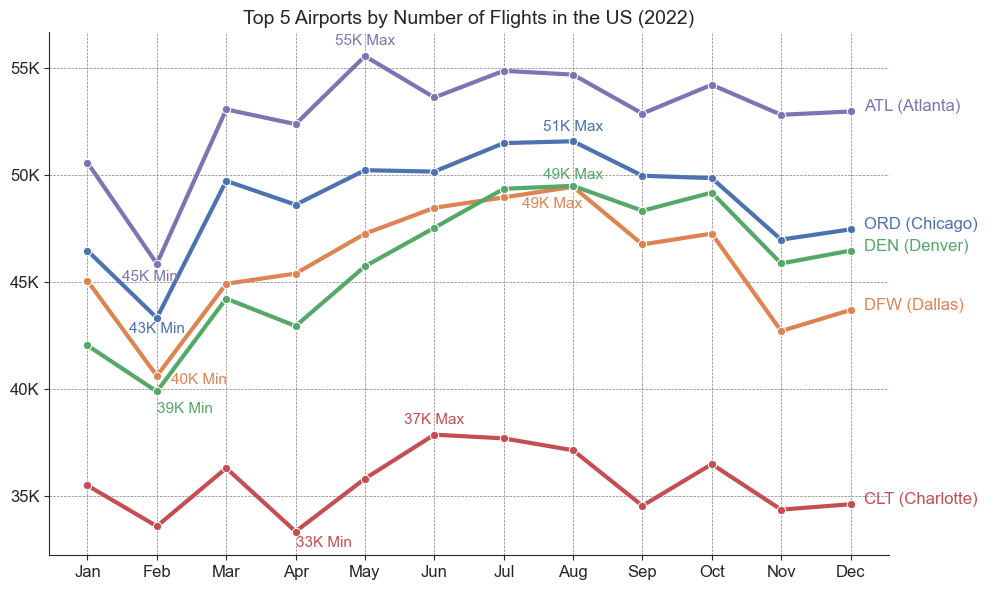

In [153]:
sns.set_style('ticks')
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_2022_to_plot, x='FL_MONTH_SHORT',
 y='TOTAL_FLIGHTS', hue = 'airport_full_name',
 marker = 'o', linewidth=3, palette='deep')

ax = plt.gca() # used to apply formatter later
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
sns.despine()
plt.legend().remove()
plt.title('Top 5 Airports by Number of Flights in the US (2022)', fontsize = 14)
plt.ylabel('')
plt.xlabel('')

palette = sns.color_palette('deep') # We can access each color that seaborn uses for values and then assign it to the list. Now we can use indexes to get the same color for values as our lines are using.
colors = {
'ORD (Chicago)': palette[0],
'DFW (Dallas)': palette[1],
'DEN (Denver)': palette[2],
'CLT (Charlotte)': palette[3],
'ATL (Atlanta)': palette[4]
}

# Mapping Month to Index
month_to_index = {month: i for i, month in enumerate(df_2022_to_plot['FL_MONTH_SHORT'].unique())} # we basically required this part of the code to be able to adjust our x-value
# since FL_MONTH is non numerical value we mapped each month to its respective index, number we can now manipulate. Chat GPT helped me to code it. 

# Plotting Each Airport to Its respective position
for airport in df_2022_to_plot['airport_full_name'].unique():
    last_row = df_2022_to_plot[df_2022_to_plot['airport_full_name'] == airport].iloc[-1]
    x_value = month_to_index[last_row['FL_MONTH_SHORT']] + 0.2  # Small offset to the right
    plt.text(x_value, last_row['TOTAL_FLIGHTS'], airport, color=colors[airport], fontsize=12)

# these offset values are used to properly change the position of each number
offset_max_y = {
'ORD (Chicago)': 500,
'DFW (Dallas)': -1000,
'DEN (Denver)': 300,
'CLT (Charlotte)': 500,
'ATL (Atlanta)': 500
}
offset_max_x = {
'ORD (Chicago)': 0,
'DFW (Dallas)': -0.3,
'DEN (Denver)': 0,
'CLT (Charlotte)': 0,
'ATL (Atlanta)': 0
}
offset_min_y = {
'ORD (Chicago)': -700,
'DFW (Dallas)': -400,
'DEN (Denver)': -1000,
'CLT (Charlotte)': -700,
'ATL (Atlanta)': -800
}
offset_min_x = {
'ORD (Chicago)': -0.4,
'DFW (Dallas)': 0.2,
'DEN (Denver)': 0,
'CLT (Charlotte)': 0,
'ATL (Atlanta)': -0.5
}

# this loop is used to plot min and max values with respect to self-defined offsets. 
for airport in df_2022_to_plot['airport_full_name'].unique():
    # Filter data for the current airport
    airport_data = df_2022_to_plot[df_2022_to_plot['airport_full_name'] == airport]
    
    # Find min and max values
    max_value = airport_data['TOTAL_FLIGHTS'].max()
    min_value = airport_data['TOTAL_FLIGHTS'].min()

    # Get corresponding months for min and max values
    max_month = airport_data[airport_data['TOTAL_FLIGHTS'] == max_value]['FL_MONTH_SHORT'].values[0]
    min_month = airport_data[airport_data['TOTAL_FLIGHTS'] == min_value]['FL_MONTH_SHORT'].values[0]
    
    # Annotate max value
    plt.text(month_to_index[max_month] + offset_max_x[airport], max_value  + offset_max_y[airport], f'{int(max_value/1000)}K Max', color=colors[airport], ha='center', fontsize = 11) # we used the same dictionary
    # Min value
    plt.text(month_to_index[min_month] + offset_min_x[airport], min_value +  offset_min_y[airport], f'{int(min_value/1000)}K Min', color=colors[airport], ha='left', fontsize = 11)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.tight_layout()
plt.show()

In [66]:
# I am happy with this visualization, let's move on to the most "succesful" airlines
df_2022.head(1)

,FL_DATE,DEP_HOUR,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,CRS_DEP_TIME,DEP_DELAY,AIR_TIME,DISTANCE,CANCELLED,YEAR OF MANUFACTURE,MANUFACTURER,ICAO TYPE,FL_MONTH_SHORT
0,2022-01-01,6,AA,1,AA,1,N106NN,JFK,LAX,2022-01-01 06:57:00,2022-01-01 07:00:00,-3,347,2475,0,2014,Airbus,A321,Jan


In [67]:
# MKT_UNIQUE_CARRIER or OP_UNIQUE_CARRIER can be used to detect airline. I assume that this value can't change during a flight since I never heard about stops in the air,
# however, just to be sure.
df_2022[df_2022['MKT_UNIQUE_CARRIER'] != df_2022['OP_UNIQUE_CARRIER']].head(5)

,FL_DATE,DEP_HOUR,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,CRS_DEP_TIME,DEP_DELAY,AIR_TIME,DISTANCE,CANCELLED,YEAR OF MANUFACTURE,MANUFACTURER,ICAO TYPE,FL_MONTH_SHORT
1451,2022-01-01,0,AA,2950,OO,2950,N720EV,BIS,DFW,2022-01-01 00:00:00,2022-01-01 08:00:00,0,0,977,1,2003,Bombardier,CRJ7,Jan
1452,2022-01-01,20,AA,2952,OO,2952,N719EV,DFW,YUM,2022-01-01 20:43:00,2022-01-01 19:50:00,53,156,1022,0,2003,Bombardier,CRJ7,Jan
1453,2022-01-01,9,AA,2953,OO,2953,N708SK,AUS,ASE,2022-01-01 09:48:00,2022-01-01 09:53:00,-5,160,812,0,2004,Bombardier,CRJ7,Jan
1454,2022-01-01,6,AA,2954,OO,2954,N724EV,SFO,LAX,2022-01-01 06:29:00,2022-01-01 06:30:00,-1,52,337,0,2004,Bombardier,CRJ7,Jan
1455,2022-01-01,6,AA,2957,OO,2957,N763SK,BUR,PHX,2022-01-01 06:54:00,2022-01-01 07:00:00,-6,65,369,0,2005,Bombardier,CRJ7,Jan


In [68]:
# It seems like I was completely wrong. OP_UNIQUE_CARRIER stands for Operating Carrier Flight Number and MKT_UNIQUE_CARRIER stabds fir Marketing Carrier Flight Number.

In [69]:
df_carriers = pd.read_csv('Carriers.csv')

In [70]:
# Joining tables to get both MKT and OP airlines
df_merged = pd.merge(df_2022, df_carriers, 
                     left_on='MKT_UNIQUE_CARRIER', right_on='CODE', how='inner')

# Drop the 'CODE' column and rename 'DESCRIPTION' to 'MKT_AIRLINE'
df_merged = df_merged.drop(columns=['CODE']).rename(columns={'DESCRIPTION': 'MKT_AIRLINE'})

In [71]:
df_merged = pd.merge(df_merged, df_carriers, 
                     left_on='OP_UNIQUE_CARRIER', right_on='CODE', how='inner')

# Drop the 'CODE' column and rename 'DESCRIPTION' to 'OP_AIRLINE'
df_merged = df_merged.drop(columns=['CODE']).rename(columns={'DESCRIPTION': 'OP_AIRLINE'})

In [72]:
top_5_MKT_airlines = df_merged.groupby('MKT_AIRLINE').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending= False).head(5)

In [73]:
top_5_OP_airlines = df_merged.groupby('OP_AIRLINE').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending= False).head(5)

In [74]:
top_5_MKT_airlines['MKT_AIRLINE'] = top_5_MKT_airlines['MKT_AIRLINE'].str.replace(r'Inc.|Co.', '', regex=True).str.strip()
top_5_OP_airlines['OP_AIRLINE'] = top_5_OP_airlines['OP_AIRLINE'].str.replace(r'Inc.|Co.', '', regex=True).str.strip()

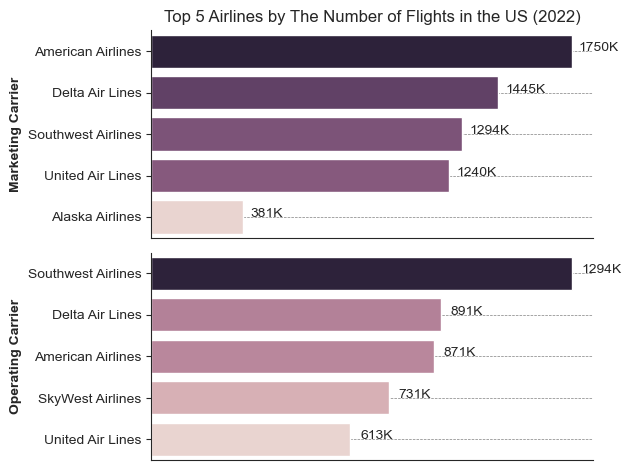

In [75]:
fig, ax = plt.subplots(2, 1)
sns.barplot(data=top_5_MKT_airlines,  x = 'COUNT', y = 'MKT_AIRLINE', ax=ax[0], hue = 'COUNT')
sns.despine()
ax[0].legend().remove()
ax[0].get_xaxis().set_visible(False)
ax[0].set_xlabel('')
# ax[0].set_xlim([300_000, 1_800_000])
ax[0].set_ylabel('Marketing Carrier', fontsize=10, fontweight='bold')
ax[0].set_title('Top 5 Airlines by The Number of Flights in the US (2022)')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
for company, row in top_5_MKT_airlines.iterrows():
    row_count = row['COUNT']
    ax[0].text(row_count + 30000, row['MKT_AIRLINE'], f'{int(row_count/1000)}K')


sns.barplot(data=top_5_OP_airlines,  x = 'COUNT', y = 'OP_AIRLINE', ax=ax[1], hue = 'COUNT')
ax[1].legend().remove()
# ax[1].set_xlim([300_000, 1_800_000])
ax[1].get_xaxis().set_visible(False)
ax[1].set_xlabel('')
ax[1].set_ylabel('Operating Carrier', fontsize=10, fontweight='bold')
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
for company, row in top_5_OP_airlines.iterrows():
    row_count = row['COUNT']
    ax[1].text(row_count + 30000, row['OP_AIRLINE'], f'{int(row_count/1000)}K')

plt.tight_layout()
plt.show()

In [65]:
# As we can see in terms of Marketed flights there are 4 major companies: American Airlines, Delta Air Lines, Southwest Airlines, United Air Lines
# In terms of Operating flights there are the same airlines but with a big lead from Southwest Airlines and SkyWest in top 4 instead of United Air Lines.
# Let's look at the same statistic in percentages.

In [76]:
top_5_MKT_airlines['TOTAL'] = top_5_MKT_airlines['COUNT'].sum()
top_5_MKT_airlines['PERCENTAGE'] = round(top_5_MKT_airlines['COUNT'] / top_5_MKT_airlines['TOTAL'] * 100, 2)
top_5_MKT_airlines.head(5)

,MKT_AIRLINE,COUNT,TOTAL,PERCENTAGE
2,American Airlines,1750416,6113490,28.63
3,Delta Air Lines,1445839,6113490,23.65
7,Southwest Airlines,1294853,6113490,21.18
9,United Air Lines,1240798,6113490,20.30
0,Alaska Airlines,381584,6113490,6.24


In [77]:
top_5_OP_airlines['TOTAL'] = top_5_OP_airlines['COUNT'].sum()
top_5_OP_airlines['PERCENTAGE'] = round(top_5_OP_airlines['COUNT'] / top_5_OP_airlines['TOTAL'] * 100, 2)
top_5_OP_airlines.head(5)

,OP_AIRLINE,COUNT,TOTAL,PERCENTAGE
18,Southwest Airlines,1294853,4402218,29.41
5,Delta Air Lines,891336,4402218,20.25
3,American Airlines,871519,4402218,19.80
17,SkyWest Airlines,731228,4402218,16.61
20,United Air Lines,613282,4402218,13.93


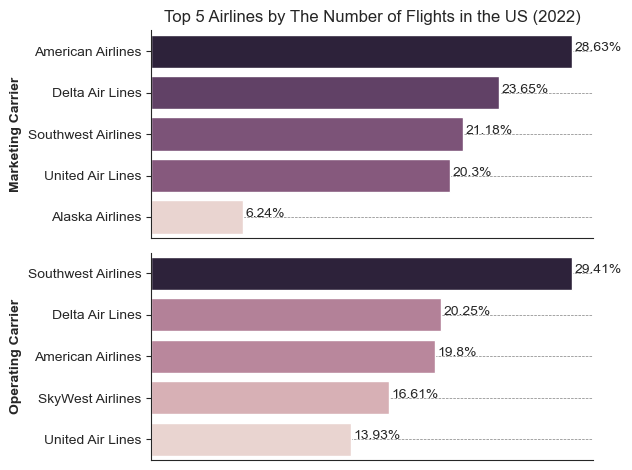

In [78]:
fig, ax = plt.subplots(2, 1)
sns.barplot(data=top_5_MKT_airlines,  x = 'PERCENTAGE', y = 'MKT_AIRLINE', ax=ax[0], hue = 'COUNT')
sns.despine()
ax[0].legend().remove()
ax[0].get_xaxis().set_visible(False)
ax[0].set_xlabel('')
ax[0].set_ylabel('Marketing Carrier', fontsize=10, fontweight='bold')
ax[0].set_title('Top 5 Airlines by The Number of Flights in the US (2022)', fontsize=12)
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
for company, row in top_5_MKT_airlines.iterrows():
    row_count = row['PERCENTAGE']
    ax[0].text(row_count + 0.2, row['MKT_AIRLINE'], f'{row_count}%',fontsize=10)


sns.barplot(data=top_5_OP_airlines,  x = 'PERCENTAGE', y = 'OP_AIRLINE', ax=ax[1], hue = 'COUNT')
ax[1].legend().remove()
ax[1].get_xaxis().set_visible(False)
ax[1].set_xlabel('')
ax[1].set_ylabel('Operating Carrier', fontsize=10, fontweight='bold')
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
for company, row in top_5_OP_airlines.iterrows():
    row_count = row['PERCENTAGE']
    ax[1].text(row_count + 0.2, row['OP_AIRLINE'], f'{row_count}%',fontsize=10)

plt.tight_layout()
plt.show()

In [79]:
# I want to potentially imrove visualization by adding comparison between long and short flights. 
# Let's say that flights that are more than 120 minues are long and less are short flights. This way we can understand how "impactful" each flight
df_merged['SHORT_OR_LONG'] = df_merged['AIR_TIME'].apply(lambda x: 'Long Flight' if x > 120 else 'Short Flight')
df_merged.head(1)

,FL_DATE,DEP_HOUR,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,...,AIR_TIME,DISTANCE,CANCELLED,YEAR OF MANUFACTURE,MANUFACTURER,ICAO TYPE,FL_MONTH_SHORT,MKT_AIRLINE,OP_AIRLINE,SHORT_OR_LONG
0,2022-01-01,6,AA,1,AA,1,N106NN,JFK,LAX,2022-01-01 06:57:00,...,347,2475,0,2014,Airbus,A321,Jan,American Airlines Inc.,American Airlines Inc.,Long Flight


In [80]:
# I want to clean this column
df_merged['MKT_AIRLINE'] = df_merged['MKT_AIRLINE'].str.replace(r'Inc.|Co.', '', regex=True).str.strip()
df_merged['OP_AIRLINE'] = df_merged['OP_AIRLINE'].str.replace(r'Inc.|Co.', '', regex=True).str.strip()

In [81]:
# Now we need to filter for top 5 airlines since we can't use just a head
MKT_airlines = df_merged.groupby(['SHORT_OR_LONG', 'MKT_AIRLINE']).size().reset_index(name = 'COUNT').sort_values(by='COUNT', ascending = False)
top_5_MKT_list = list(top_5_MKT_airlines['MKT_AIRLINE'])
MKT_airlines = MKT_airlines[MKT_airlines['MKT_AIRLINE'].isin(top_5_MKT_list)]

In [82]:
# Let's prepare same dataset for operated airlines
OP_airlines = df_merged.groupby(['SHORT_OR_LONG', 'OP_AIRLINE']).size().reset_index(name = 'COUNT').sort_values(by='COUNT', ascending = False)
top_5_OP_list = list(top_5_OP_airlines['OP_AIRLINE'])
OP_airlines = OP_airlines[OP_airlines['OP_AIRLINE'].isin(top_5_OP_list)]

In [83]:
# Calculate the total number of flights per airline
total_flights = MKT_airlines.groupby('MKT_AIRLINE')['COUNT'].sum().reset_index(name='TOTAL_FLIGHTS')
# Merge total flights back into the original DataFrame
MKT_airlines = MKT_airlines.merge(total_flights, on='MKT_AIRLINE')
# Calculate the percentage
MKT_airlines['PERCENTAGE'] = round((MKT_airlines['COUNT'] / MKT_airlines['TOTAL_FLIGHTS'])* 100, 2)

In [84]:
# Calculate the total number of flights per airline
total_flights = OP_airlines.groupby('OP_AIRLINE')['COUNT'].sum().reset_index(name='TOTAL_FLIGHTS')
# Merge total flights back into the original DataFrame
OP_airlines = OP_airlines.merge(total_flights, on='OP_AIRLINE')
# Calculate the percentage
OP_airlines['PERCENTAGE'] = round((OP_airlines['COUNT'] / OP_airlines['TOTAL_FLIGHTS']) * 100, 2)

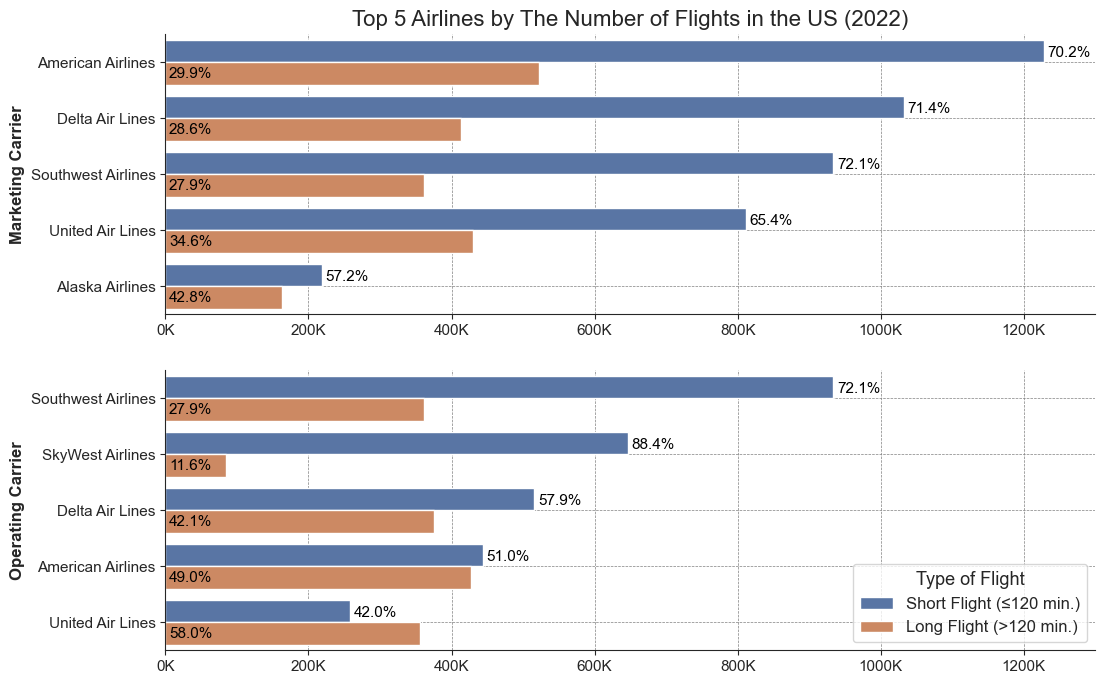

In [87]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sns.barplot(data=MKT_airlines,  x = 'COUNT', y = 'MKT_AIRLINE', ax=ax[0], hue = 'SHORT_OR_LONG', palette='deep')
sns.despine()
ax[0].legend().remove()
ax[0].set_xlim([0, 1_300_000])
ax[0].set_xlabel('')
ax[0].set_ylabel('Marketing Carrier', fontsize=12, fontweight='bold')
ax[0].set_title('Top 5 Airlines by The Number of Flights in the US (2022)',fontsize=16)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax[0].tick_params(axis='y', labelsize=11)
ax[0].tick_params(axis='x', labelsize=11)
# Mapping airlines to indices for MKT_airlines
airline_to_index = {airline: i for i, airline in enumerate(MKT_airlines['MKT_AIRLINE'].unique())}

# Annotate Marketing Carrier bars
for index, row in MKT_airlines[MKT_airlines['SHORT_OR_LONG'] == 'Short Flight'].iterrows():
    count = row['COUNT']
    airline = row['MKT_AIRLINE']
    percentage = row['PERCENTAGE']
    y_value = airline_to_index[airline] - 0.175  # Adjust the position slightly
    ax[0].text(count + 5000, y_value, f'{percentage:.1f}%', color='black', va='center', fontsize=11)

for index, row in MKT_airlines[MKT_airlines['SHORT_OR_LONG'] == 'Long Flight'].iterrows():
    count = row['COUNT']
    airline = row['MKT_AIRLINE']
    percentage = row['PERCENTAGE']
    y_value = airline_to_index[airline] + 0.2  # Adjust the position slightly
    ax[0].text(5000, y_value, f'{percentage:.1f}%', color='black', va='center', fontsize=11)


sns.barplot(data=OP_airlines,  x = 'COUNT', y = 'OP_AIRLINE', ax=ax[1], hue = 'SHORT_OR_LONG', palette='deep')
ax[1].set_xlabel('')
ax[1].set_xlim([0, 1_300_000])
ax[1].set_ylabel('Operating Carrier', fontsize=12, fontweight='bold')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
handles, labels = ax[1].get_legend_handles_labels()
labels = ['Short Flight (≤120 min.)', 'Long Flight (>120 min.)']  # New labels
ax[1].legend(handles=handles, labels=labels, title='Type of Flight', fontsize=12, title_fontsize=13, loc='lower right')
ax[1].tick_params(axis='y', labelsize=11)
ax[1].tick_params(axis='x', labelsize=11)

# Mapping airlines to indices for OP_airlines
airline_to_index_op = {airline: i for i, airline in enumerate(OP_airlines['OP_AIRLINE'].unique())}

# Annotate Operating Carrier bars
for index, row in OP_airlines[OP_airlines['SHORT_OR_LONG'] == 'Short Flight'].iterrows():
    count = row['COUNT']
    airline = row['OP_AIRLINE']
    percentage = row['PERCENTAGE']
    y_value = airline_to_index_op[airline] - 0.175  # Adjust the position slightly
    ax[1].text(count + 5000, y_value, f'{percentage:.1f}%', color='black', va='center', fontsize=11)

for index, row in OP_airlines[OP_airlines['SHORT_OR_LONG'] == 'Long Flight'].iterrows():
    count = row['COUNT']
    airline = row['OP_AIRLINE']
    percentage = row['PERCENTAGE']
    y_value = airline_to_index_op[airline] + 0.2  # Adjust the position slightly
    ax[1].text(5000, y_value, f'{percentage:.1f}%', color='black', va='center', fontsize=11)

plt.show()
# Future idea: we can use scatter plot instead. 
# We can group values based on time of flight. 
# Then we can calculate percentage. Put percentage on one side and 
# our groups of time on different side. 
# For example, 10 different groups of time. Super-Short, Short.. and so on
# Future idea: how often companies that sale and operate differ.
# In other words, how often companies sell tickets but do not operate flight.

In [88]:
# Data on aircraft: 1) Histogram of year of manufacture. 2) What are some of the popular aircrafts. 
# this if a formula to calc number of bins
n_bins = int((df_2022['YEAR OF MANUFACTURE'].max() - df_2022['YEAR OF MANUFACTURE'].min()))

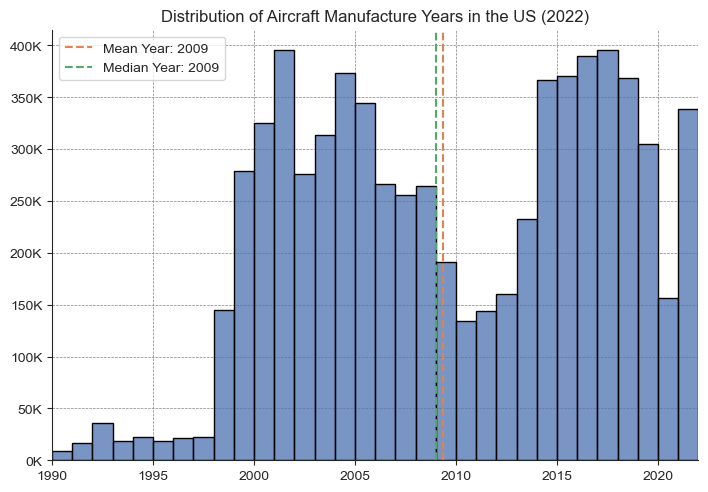

In [90]:
sns.displot(data = df_2022['YEAR OF MANUFACTURE'], binwidth=1, bins = n_bins, edgecolor='black',height=5, aspect=1.5,  color = palette[0])
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))
plt.xlim(1990, 2022)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
mean_year = df_2022['YEAR OF MANUFACTURE'].mean()
median_year = df_2022['YEAR OF MANUFACTURE'].median()
plt.axvline(x=mean_year, color=palette[1], linestyle='--', label=f'Mean Year: {int(mean_year)}')
plt.axvline(x=median_year, color=palette[2], linestyle='--', label=f'Median Year: {int(median_year)}')

plt.legend()
plt.title('Distribution of Aircraft Manufacture Years in the US (2022)', fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.show()
# So on average we can see that airplanes are 13 y.o. 
# with a large chunk made before 2010 and after 2010. 
# Future idea: we can look at the average age of the airplanes based on the model used.

In [78]:
# Popular aircraft. Simply calculating by the records would be wrong, instead I think we need to count base on TAIL_NUM which stands FAA N-Number/Registration. Which is unqiue for each plane.
df_merged.head(1)

,FL_DATE,DEP_HOUR,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,...,AIR_TIME,DISTANCE,CANCELLED,YEAR OF MANUFACTURE,MANUFACTURER,ICAO TYPE,FL_MONTH_SHORT,MKT_AIRLINE,OP_AIRLINE,SHORT_OR_LONG
0,2022-01-01,6,AA,1,AA,1,N106NN,JFK,LAX,2022-01-01 06:57:00,...,347,2475,0,2014,Airbus,A321,Jan,American Airlines,American Airlines,Long Flight


In [91]:
df_unqiue_planes = df_merged.drop_duplicates(subset='TAIL_NUM')

In [92]:
df_planes = df_unqiue_planes.groupby(['MANUFACTURER','ICAO TYPE']).size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False)

In [93]:
df_planes['FULL MODEL NAME'] = df_planes['ICAO TYPE'] + ' ' + '(' + df_planes['MANUFACTURER'] + ')'

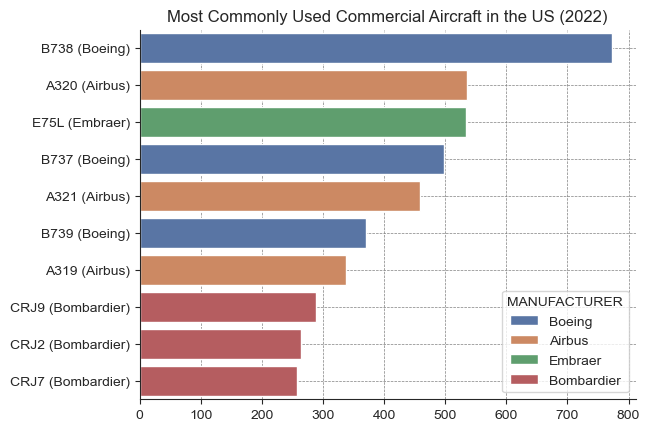

In [149]:
sns.barplot(data=df_planes.head(10),x='COUNT',y = 'FULL MODEL NAME', hue = 'MANUFACTURER', palette='deep')
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.title('Most Commonly Used Commercial Aircraft in the US (2022)',fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [96]:
cancellation = pd.read_csv('Cancellation.csv')

In [97]:
# I want to take compare top 3 companies among marketing carriers.- Percentage of cancellation and departure delay. We can use DEP_DELAY
# to calculate two columns - one will stand for cancelletion, second for delay. Finnaly, we will plot both of these values on one pie chart for top 3 companies
pd_merged = pd.merge(df_merged,cancellation, left_on = 'CANCELLED', right_on = 'STATUS')

In [98]:
pd_merged.drop('STATUS', inplace = True, axis = 1)
pd_merged.head(1)

,FL_DATE,DEP_HOUR,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,...,DISTANCE,CANCELLED,YEAR OF MANUFACTURE,MANUFACTURER,ICAO TYPE,FL_MONTH_SHORT,MKT_AIRLINE,OP_AIRLINE,SHORT_OR_LONG,CANCELLATION_REASON
0,2022-01-01,6,AA,1,AA,1,N106NN,JFK,LAX,2022-01-01 06:57:00,...,2475,0,2014,Airbus,A321,Jan,American Airlines,American Airlines,Long Flight,Not Cancelled


In [99]:
# what is the most often reason for cancellations
cancelled_reasons_df = pd_merged.groupby('CANCELLATION_REASON').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending = False)

In [100]:
cancelled_reasons_df = cancelled_reasons_df[cancelled_reasons_df['CANCELLATION_REASON'] != 'Not Cancelled']
cancelled_reasons_df

,CANCELLATION_REASON,COUNT
4,Weather Cancellation,78022
0,Carrier Cancellation,55186
1,National Air System Cancellation,14495
3,Security Cancellation,127


In [144]:
colors = sns.color_palette('deep')

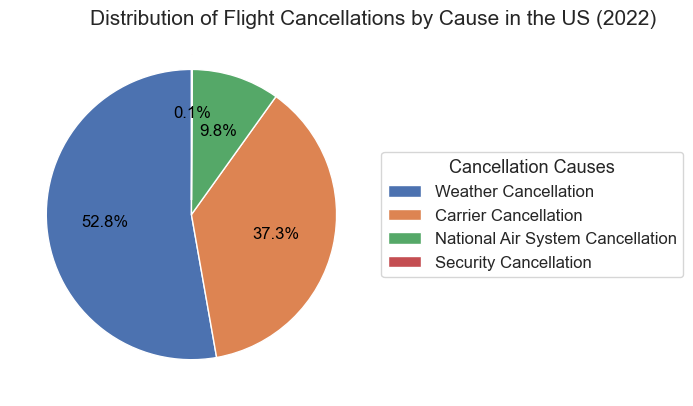

In [145]:
fig, ax = plt.subplots() # mostly generated by GPT

slices, labels, percent_labels = ax.pie(
    cancelled_reasons_df['COUNT'], 
    labels=None, # No labels because we use legend instead
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0, 0, 0,0.1)
)
ax.legend(
    slices, 
    cancelled_reasons_df['CANCELLATION_REASON'], 
    title="Cancellation Causes",
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12,
    title_fontsize='13'
)
# to avoid overlap between percet_labels
for percent in percent_labels:
    percent.set_color('black')
    percent.set_fontsize(12)

plt.title("Distribution of Flight Cancellations by Cause in the US (2022)", loc='center', fontsize = 15, x=1)
plt.tight_layout()
plt.show()

In [90]:
# what these cancellation really stand for?
# The most popular reason for cancellation is weather

In [91]:
# I want to take compare top 4 companies among marketing carriers.- Percentage of cancellation and departure delay. We can use DEP_DELAY
# to calculate two columns - one will stand for cancelletion, second for delay. Finnaly, we will plot both of these values on one pie chart for top 4 companies
# we will probably need to make a new column that will indicate if flight was delayed for more than 30 min, but less than 120, second if it was delayed for more than 120 min or if it was cancelled
# def success_category(row):
#     if row['CANCELLED'] != 0:
#         return 'Cancelled'
#     elif row['DEP_DELAY'] > 120:
#         return 'More Than 2h Delay'
#     elif row['DEP_DELAY'] > 30:
#         return 'Less Than 2h Delay'
#     else:
#         return 'Minor or No Delay'

In [92]:
# Apply the function to each row and create a new column
# pd_merged['Success_Category'] = pd_merged.apply(success_category, axis=1)

In [93]:
# pd_to_plot_success =pd_merged.groupby(['MKT_AIRLINE','Success_Category']).size().reset_index(name = 'COUNT').sort_values(by='COUNT',ascending=False)

In [94]:
# top_4_airlines_list = list(pd_merged.groupby('MKT_AIRLINE').size().sort_values(ascending=False).head(4).index)

In [95]:
# pd_to_plot_success = pd_to_plot_success[pd_to_plot_success['MKT_AIRLINE'].isin(top_4_airlines_list)]

In [96]:
# airline_order = ['Delta Air Lines', 'United Air Lines', 'American Airlines', 'Southwest Airlines']

# fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# axes = axes.flatten()

# for i, airline in enumerate(airline_order):
#     airline_data = pd_to_plot_success[pd_to_plot_success['MKT_AIRLINE'] == airline]
#     axes[i].pie(airline_data['COUNT'], labels=None, autopct='%1.1f%%', startangle=90)
#     axes[i].set_title(airline)


# fig.legend(
#     labels=airline_data['Success_Category'].unique(),
#     title="Success Category",
#     loc="center", 
#     fontsize=12
# )
    
# plt.tight_layout()
# plt.show()

In [97]:
# pd_merged.drop('Success_Category',axis = 1, inplace = True)

In [108]:
# I think More than 2h delay is just too little to tell us anything. We better remove it. 
def success_category(row):
    if row['CANCELLED'] != 0:
        return 'Cancelled'
    elif row['DEP_DELAY'] > 30:
        return 'More Than 30m Delay'
    else:
        return 'Minor or No Delay'

In [109]:
pd_merged['SUCCESS_CATEGORY'] = pd_merged.apply(success_category, axis=1)

In [110]:
pd_to_plot_success =pd_merged.groupby(['MKT_AIRLINE','SUCCESS_CATEGORY']).size().reset_index(name = 'COUNT').sort_values(by='COUNT',ascending=False)
top_4_airlines_list = list(pd_merged.groupby('MKT_AIRLINE').size().sort_values(ascending=False).head(4).index)
pd_to_plot_success = pd_to_plot_success[pd_to_plot_success['MKT_AIRLINE'].isin(top_4_airlines_list)]

In [142]:
colors = sns.color_palette('deep')
custom_colors = [colors[0], colors[1], colors[3]]

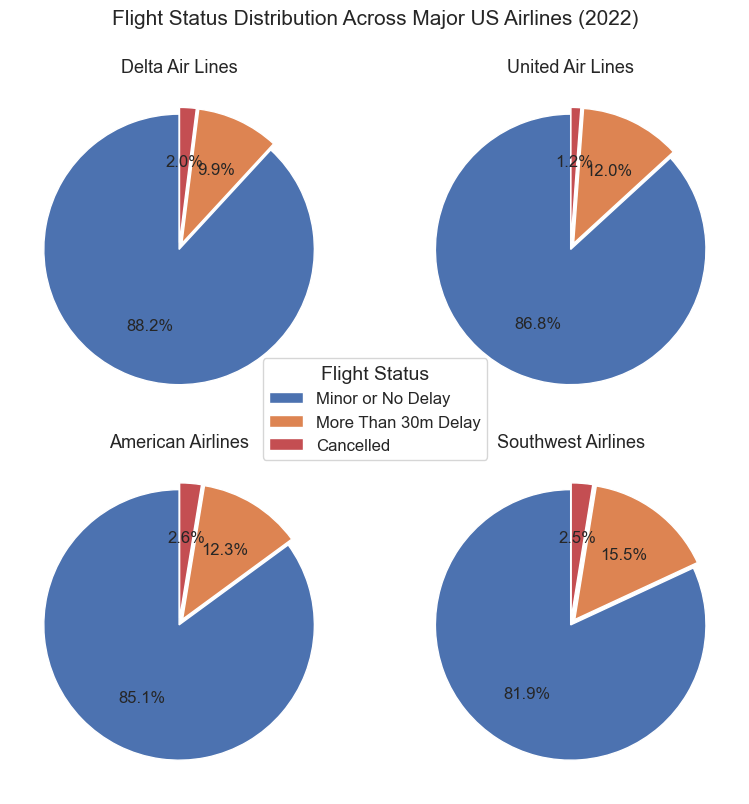

In [143]:
airline_order = ['Delta Air Lines', 'United Air Lines', 'American Airlines', 'Southwest Airlines']

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes = axes.flatten()

for i, airline in enumerate(airline_order):
    airline_data = pd_to_plot_success[pd_to_plot_success['MKT_AIRLINE'] == airline]
    slices, labels, percent_labels = axes[i].pie(
        airline_data['COUNT'], 
        labels=None, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors = custom_colors,
        explode=(0, 0.05, 0.05)
        )
    axes[i].set_title(airline, fontsize = 13)
    for autotext in percent_labels:
        autotext.set_fontsize(12)  # Increase font size of pie chart values

fig.suptitle('Flight Status Distribution Across Major US Airlines (2022)', fontsize=15, y=1)

fig.legend(
    labels=airline_data['SUCCESS_CATEGORY'].unique(),
    title="Flight Status",
    loc="center", 
    fontsize=12,
    title_fontsize = 14,
    bbox_to_anchor=(0.25, 0, 0.5, 1)
)
    
plt.tight_layout()
plt.show()

In [103]:
# Another way to potentially visualize it is to use scatterplot. Where x would stand for delay and y would stand for cancelled. But to be honest there is not much difference between airlines.
# The scatter plot or scatter plots would be too stacked

In [104]:
# Historgram for delays: we can put dealys and cancellations (COUNT != Minor or No Delay, plot based on CRS_DEP_TIME)
pd_merged.head(1)

,FL_DATE,DEP_HOUR,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,...,CANCELLED,YEAR OF MANUFACTURE,MANUFACTURER,ICAO TYPE,FL_MONTH_SHORT,MKT_AIRLINE,OP_AIRLINE,SHORT_OR_LONG,CANCELLATION_REASON,SUCCESS_CATEGORY
0,2022-01-01,6,AA,1,AA,1,N106NN,JFK,LAX,2022-01-01 06:57:00,...,0,2014,Airbus,A321,Jan,American Airlines,American Airlines,Long Flight,Not Cancelled,Minor or No Delay


In [105]:
# Now, I think our main goal of this data analysis should be optimizing your flight. Meaning: What is the best time to travel and what is the best airlines to pick. 
# We already what is the best pick among big 4 - Delta, but we can also calculate among all airlines.
# We can also calculate the best time to flight

In [113]:
# Let's calculate this number for every company
df_success_rate = pd_merged.groupby(['MKT_AIRLINE','SUCCESS_CATEGORY']).size().reset_index(name = 'COUNT').sort_values(by='COUNT',ascending=False)

In [114]:
total_lines = df_success_rate.groupby('MKT_AIRLINE')['COUNT'].sum().reset_index(name = 'TOTAL').sort_values(by = 'TOTAL', ascending=False)

In [115]:
df_success_rate = pd.merge(df_success_rate, total_lines)

In [116]:
df_success_rate['PECENTAGE'] = round(df_success_rate['COUNT'] / df_success_rate['TOTAL'] * 100,2)

In [117]:
df_success_rate.sort_values(by='PECENTAGE', ascending=False).head(3)

,MKT_AIRLINE,SUCCESS_CATEGORY,COUNT,TOTAL,PECENTAGE
13,Hawaiian Airlines,Minor or No Delay,66145,73113,90.47
4,Alaska Airlines,Minor or No Delay,337527,381584,88.45
1,Delta Air Lines,Minor or No Delay,1274534,1445839,88.15


In [118]:
# So you can use Hawaiian Airlines or Alaska Airlines when that's possible, but among big 4 you should stick with delta if you want to avoid issues with your flight as much as you can.
# Now all that's left is to find the best time to flight
pd_merged.head(1) 

,FL_DATE,DEP_HOUR,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,...,CANCELLED,YEAR OF MANUFACTURE,MANUFACTURER,ICAO TYPE,FL_MONTH_SHORT,MKT_AIRLINE,OP_AIRLINE,SHORT_OR_LONG,CANCELLATION_REASON,SUCCESS_CATEGORY
0,2022-01-01,6,AA,1,AA,1,N106NN,JFK,LAX,2022-01-01 06:57:00,...,0,2014,Airbus,A321,Jan,American Airlines,American Airlines,Long Flight,Not Cancelled,Minor or No Delay


In [119]:
df_worst_time = pd_merged[pd_merged['CANCELLATION_REASON'] == 'Weather Cancellation']

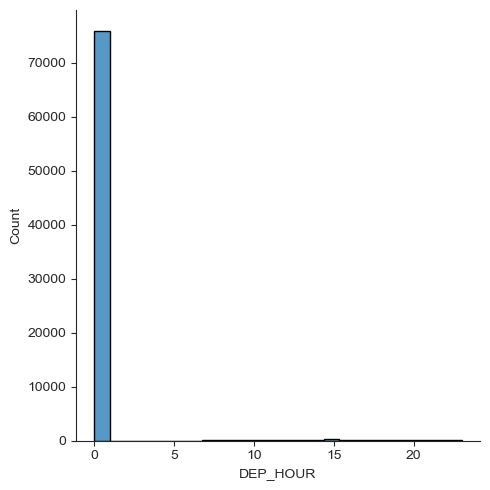

In [120]:
sns.displot(data = df_worst_time['DEP_HOUR'], edgecolor='black', bins = 24)
# Something is wrong about it

In [121]:
df_worst_time.loc[:,['DEP_HOUR','DEP_TIME','CRS_DEP_TIME','CANCELLATION_REASON']] 
# I think all flights get DEP_HOUR 0 if they were canceled
# Now, we can see that we can't rely on DEP_HOUR or DEP_TIME to make conclusion. We should extract hour from CRS_DEP_TIME and then we can make calculations

,DEP_HOUR,DEP_TIME,CRS_DEP_TIME,CANCELLATION_REASON
2,0,2022-01-01 00:00:00,2022-01-01 07:05:00,Weather Cancellation
21,0,2022-01-01 00:00:00,2022-01-01 07:40:00,Weather Cancellation
22,0,2022-01-01 00:00:00,2022-01-01 18:00:00,Weather Cancellation
35,0,2022-01-01 00:00:00,2022-01-01 16:39:00,Weather Cancellation
42,0,2022-01-01 00:00:00,2022-01-01 19:07:00,Weather Cancellation
...,...,...,...,...
6954207,0,2022-12-31 00:00:00,2022-12-31 18:40:00,Weather Cancellation
6954358,0,2022-12-31 00:00:00,2022-12-31 15:40:00,Weather Cancellation
6954491,0,2022-12-31 00:00:00,2022-12-31 20:45:00,Weather Cancellation
6954580,0,2022-12-31 00:00:00,2022-12-31 19:55:00,Weather Cancellation


In [122]:
pd_merged['CRS_DEP_TIME'] = pd.to_datetime(pd_merged['CRS_DEP_TIME'])
pd_merged['CRS_DEP_HOUR'] = pd_merged['CRS_DEP_TIME'].dt.hour
pd_merged.head(1)

,FL_DATE,DEP_HOUR,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,DEST,DEP_TIME,...,YEAR OF MANUFACTURE,MANUFACTURER,ICAO TYPE,FL_MONTH_SHORT,MKT_AIRLINE,OP_AIRLINE,SHORT_OR_LONG,CANCELLATION_REASON,SUCCESS_CATEGORY,CRS_DEP_HOUR
0,2022-01-01,6,AA,1,AA,1,N106NN,JFK,LAX,2022-01-01 06:57:00,...,2014,Airbus,A321,Jan,American Airlines,American Airlines,Long Flight,Not Cancelled,Minor or No Delay,7


In [123]:
df_worst_time = pd_merged[pd_merged['CANCELLATION_REASON'] != 'Not Cancelled']

In [124]:
df_worst_time.loc[:,['DEP_HOUR','DEP_TIME','CRS_DEP_TIME','CANCELLATION_REASON','CRS_DEP_HOUR']]

,DEP_HOUR,DEP_TIME,CRS_DEP_TIME,CANCELLATION_REASON,CRS_DEP_HOUR
2,0,2022-01-01 00:00:00,2022-01-01 07:05:00,Weather Cancellation,7
21,0,2022-01-01 00:00:00,2022-01-01 07:40:00,Weather Cancellation,7
22,0,2022-01-01 00:00:00,2022-01-01 18:00:00,Weather Cancellation,18
29,0,2022-01-01 00:00:00,2022-01-01 20:05:00,Carrier Cancellation,20
35,0,2022-01-01 00:00:00,2022-01-01 16:39:00,Weather Cancellation,16
...,...,...,...,...,...
6954207,0,2022-12-31 00:00:00,2022-12-31 18:40:00,Weather Cancellation,18
6954358,0,2022-12-31 00:00:00,2022-12-31 15:40:00,Weather Cancellation,15
6954491,0,2022-12-31 00:00:00,2022-12-31 20:45:00,Weather Cancellation,20
6954580,0,2022-12-31 00:00:00,2022-12-31 19:55:00,Weather Cancellation,19


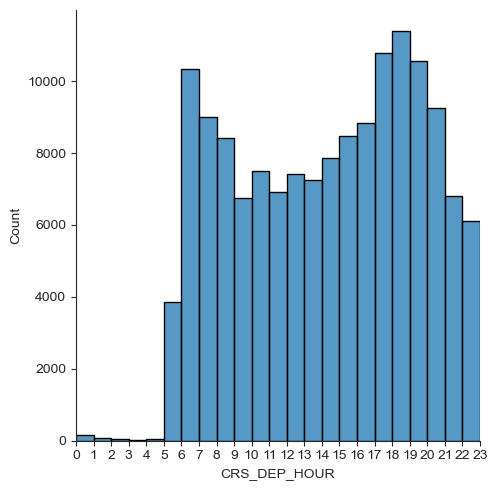

In [125]:
sns.displot(data=df_worst_time['CRS_DEP_HOUR'], edgecolor='black', bins=24, binwidth=1)
plt.xlim(0, 23)
plt.ylim(0, None)
plt.xticks(range(0, 24))
plt.show()
# This is wrong approach we can't just use count. We need to calculate how likely for your flight to get cancelled for a certain point of day. Besides, line would be a better method for that
# we can also put both cancellation and late on the same graph. 

In [126]:
# maybe we can unite cancelled and late flights in one graph?
df_split = pd_merged.groupby(['CRS_DEP_HOUR','SUCCESS_CATEGORY']).size().reset_index(name = 'SPLIT')
df_split.head()

,CRS_DEP_HOUR,SUCCESS_CATEGORY,SPLIT
0,0,Cancelled,166
1,0,Minor or No Delay,9707
2,0,More Than 30m Delay,1853
3,1,Cancelled,80
4,1,Minor or No Delay,2872


In [127]:
df_total = pd_merged.groupby('CRS_DEP_HOUR').size().reset_index(name = 'TOTAL')
df_total.head()

,CRS_DEP_HOUR,TOTAL
0,0,11726
1,1,3469
2,2,1386
3,3,1242
4,4,598


In [128]:
df_merged_cancellation = pd.merge(df_split,df_total)
df_merged_cancellation

,CRS_DEP_HOUR,SUCCESS_CATEGORY,SPLIT,TOTAL
0,0,Cancelled,166,11726
1,0,Minor or No Delay,9707,11726
2,0,More Than 30m Delay,1853,11726
3,1,Cancelled,80,3469
4,1,Minor or No Delay,2872,3469
...,...,...,...,...
67,22,Minor or No Delay,139020,177380
68,22,More Than 30m Delay,33262,177380
69,23,Cancelled,1019,54295
70,23,Minor or No Delay,44965,54295


In [129]:
df_merged_cancellation['PERCENT'] = round(df_merged_cancellation['SPLIT'] / df_merged_cancellation['TOTAL'] * 100, 2)

In [130]:
df_merged_cancellation = df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] != 'Minor or No Delay']
df_merged_cancellation.head(1)

,CRS_DEP_HOUR,SUCCESS_CATEGORY,SPLIT,TOTAL,PERCENT
0,0,Cancelled,166,11726,1.42


In [131]:
custom_colors = [colors[3], colors[1]]

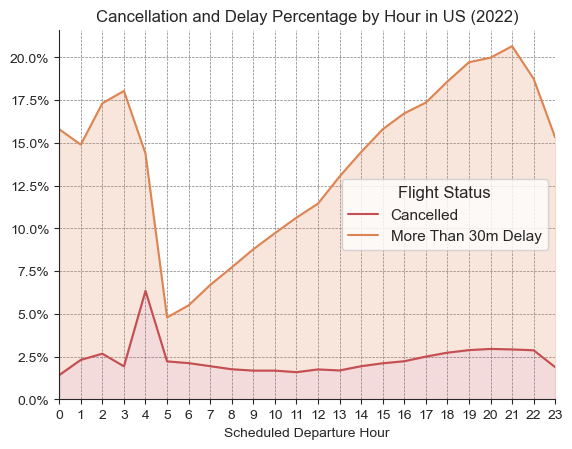

In [132]:
sns.lineplot(data=df_merged_cancellation, x = 'CRS_DEP_HOUR', y = 'PERCENT', hue = 'SUCCESS_CATEGORY', palette=custom_colors)
sns.despine()
plt.xlim(0, 23)
plt.ylim(0, None)
plt.xticks(range(0, 24))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Fill the area between 'More Than 30m Delay' and 'Cancelled'
plt.fill_between(df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'More Than 30m Delay']['CRS_DEP_HOUR'],
                 df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'Cancelled']['PERCENT'],
                 df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'More Than 30m Delay']['PERCENT'],
                 color=colors[1], alpha=0.2)

# Fill the area between 'Cancelled' and x-axis
plt.fill_between(df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'Cancelled']['CRS_DEP_HOUR'],
                 df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'Cancelled']['PERCENT'],
                 0, color=colors[3], alpha=0.2)


plt.title('Cancellation and Delay Percentage by Hour in US (2022)')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y}%'))
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    title="Flight Status",
    fontsize=11,
    title_fontsize=12
)
plt.show()



In [133]:
# Let's create same graph for monthes and finally stuck them together and I will consider this project done. For now....
df_split_M = pd_merged.groupby(['FL_MONTH_SHORT','SUCCESS_CATEGORY']).size().reset_index(name = 'SPLIT')
df_split.head()

,CRS_DEP_HOUR,SUCCESS_CATEGORY,SPLIT
0,0,Cancelled,166
1,0,Minor or No Delay,9707
2,0,More Than 30m Delay,1853
3,1,Cancelled,80
4,1,Minor or No Delay,2872


In [134]:
df_total_M = pd_merged.groupby('FL_MONTH_SHORT').size().reset_index(name = 'TOTAL')
df_total.head()

,CRS_DEP_HOUR,TOTAL
0,0,11726
1,1,3469
2,2,1386
3,3,1242
4,4,598


In [135]:
df_merged_cancellation_month = pd.merge(df_split_M,df_total_M)

In [136]:
df_merged_cancellation_month['PERCENT'] = round(df_merged_cancellation_month['SPLIT'] / df_merged_cancellation_month['TOTAL'] * 100, 2)

In [137]:
df_merged_cancellation_month = df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] != 'Minor or No Delay']
df_merged_cancellation_month.head(1)

,FL_MONTH_SHORT,SUCCESS_CATEGORY,SPLIT,TOTAL,PERCENT
0,Apr,Cancelled,11481,576982,1.99


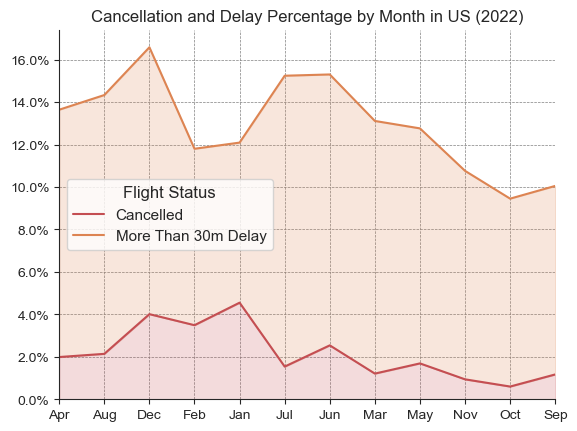

In [138]:
sns.lineplot(data=df_merged_cancellation_month, x = 'FL_MONTH_SHORT', y = 'PERCENT', hue = 'SUCCESS_CATEGORY', palette=custom_colors)
sns.despine()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Fill the area between 'More Than 30m Delay' and 'Cancelled'
plt.fill_between(df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'More Than 30m Delay']['FL_MONTH_SHORT'],
                 df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'Cancelled']['PERCENT'],
                 df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'More Than 30m Delay']['PERCENT'],
                 color=colors[1], alpha=0.2)

# Fill the area between 'Cancelled' and x-axis
plt.fill_between(df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'Cancelled']['FL_MONTH_SHORT'],
                 df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'Cancelled']['PERCENT'],
                 0, color=colors[3], alpha=0.2)

plt.xlim([df_merged_cancellation_month['FL_MONTH_SHORT'].min(), df_merged_cancellation_month['FL_MONTH_SHORT'].max()])

plt.title('Cancellation and Delay Percentage by Month in US (2022)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, None)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y}%'))
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    title="Flight Status",
    fontsize=11,
    title_fontsize=12
)
plt.show()

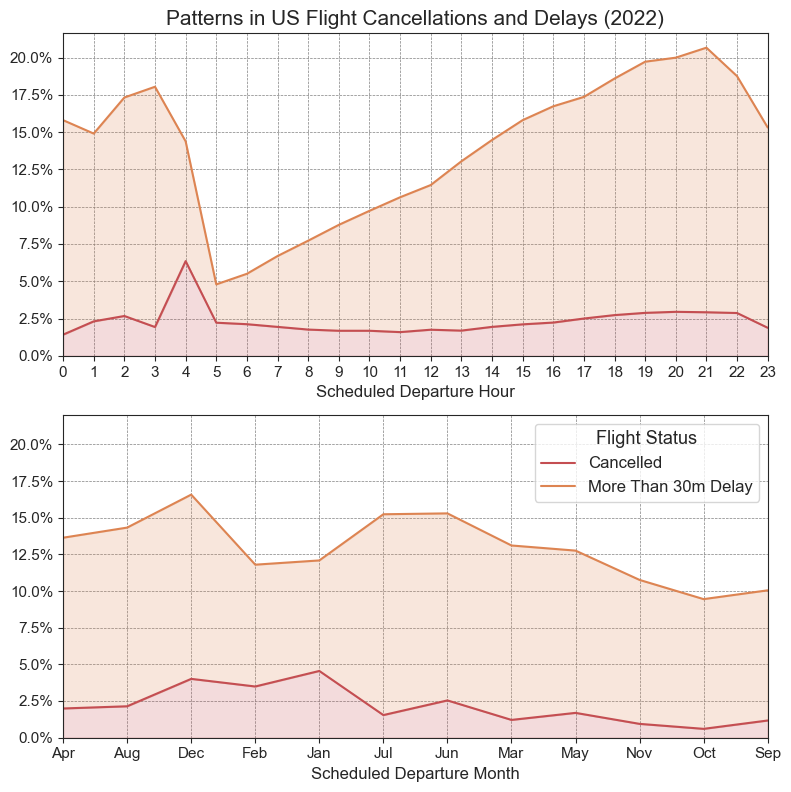

In [140]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot 1: Cancellation and Delay Percentage by Hour
sns.lineplot(data=df_merged_cancellation, x='CRS_DEP_HOUR', y='PERCENT', hue='SUCCESS_CATEGORY', palette=custom_colors, ax=ax1, legend=False)
ax1.set_xlim(0, 23)
ax1.set_ylim(0, None)
ax1.set_xticks(range(0, 24))
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Fill the area between 'More Than 30m Delay' and 'Cancelled'
ax1.fill_between(df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'More Than 30m Delay']['CRS_DEP_HOUR'],
                 df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'Cancelled']['PERCENT'],
                 df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'More Than 30m Delay']['PERCENT'],
                 color=colors[1], alpha=0.2)

# Fill the area between 'Cancelled' and x-axis
ax1.fill_between(df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'Cancelled']['CRS_DEP_HOUR'],
                 df_merged_cancellation[df_merged_cancellation['SUCCESS_CATEGORY'] == 'Cancelled']['PERCENT'],
                 0, color=colors[3], alpha=0.2)

ax1.set_title('Patterns in US Flight Cancellations and Delays (2022)', fontsize = 15)
ax1.set_xlabel('Scheduled Departure Hour', fontsize = 12)
ax1.set_ylabel('')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y}%'))
ax1.tick_params(axis='y', labelsize=11)
ax1.tick_params(axis='x', labelsize=11)

# Plot 2: Cancellation and Delay Percentage by Month
sns.lineplot(data=df_merged_cancellation_month, x='FL_MONTH_SHORT', y='PERCENT', hue='SUCCESS_CATEGORY', palette=custom_colors, ax=ax2)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Fill the area between 'More Than 30m Delay' and 'Cancelled'
ax2.fill_between(df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'More Than 30m Delay']['FL_MONTH_SHORT'],
                 df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'Cancelled']['PERCENT'],
                 df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'More Than 30m Delay']['PERCENT'],
                 color=colors[1], alpha=0.2)

# Fill the area between 'Cancelled' and x-axis
ax2.fill_between(df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'Cancelled']['FL_MONTH_SHORT'],
                 df_merged_cancellation_month[df_merged_cancellation_month['SUCCESS_CATEGORY'] == 'Cancelled']['PERCENT'],
                 0, color=colors[3], alpha=0.2)

ax2.set_xlim([df_merged_cancellation_month['FL_MONTH_SHORT'].min(), df_merged_cancellation_month['FL_MONTH_SHORT'].max()])
ax2.set_xlabel('Scheduled Departure Month', fontsize = 12)
ax2.set_ylabel('')
ax2.set_ylim(0, 22)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y}%'))

# Adjust the layout
plt.tight_layout()

# Add a single legend for both plots
handles, labels = plt.gca().get_legend_handles_labels()
ax2.legend(
    title="Flight Status",
    fontsize=12,
    title_fontsize=13
)
ax2.tick_params(axis='y', labelsize=11)
ax2.tick_params(axis='x', labelsize=11)
plt.show()
# There are many comments because I asked GPT to put two plotes together

In [ ]:
# Maybe change some colors around. Clean. Write Conclusion. Upload to GITHub. Post on Linkein. Update Resume